In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.dataset import dataset_experiments, compute_spectrum
%load_ext autoreload
%autoreload 2

In [2]:
common_folder = '/scratch/pp2681/mom6/Feb2022/bare'
exps = ('R2', 'R4', 'R8', 'R16', 'R32', 'R64')

In [3]:
ds = dataset_experiments(common_folder, exps)

# Double Gyre. Model domain and layer interfaces
- Model domain - "bowl" with one vertical wall
- There are two fluid layers. Interface between them is shown in orange.
- Mean "ciruclation" (given by SSH) is shown by contours.
- Turbulence is forced by wind (in blue lines)

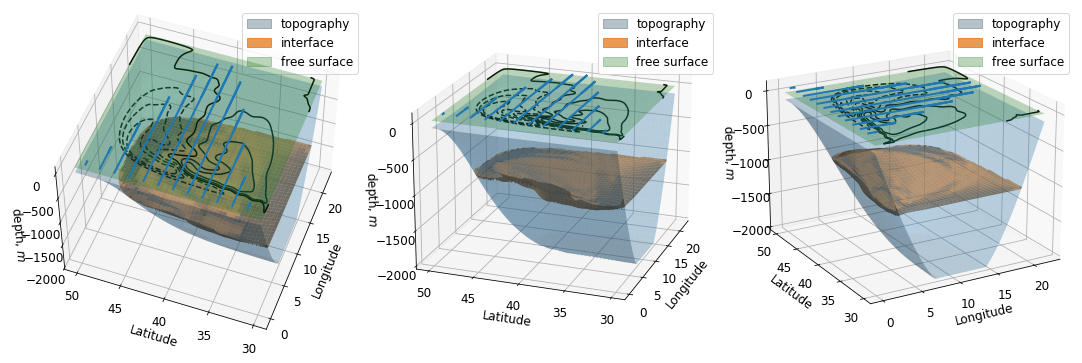

In [5]:
ds.plot_domain('R16')

# Relative vorticity in units of local Coriolis parameter

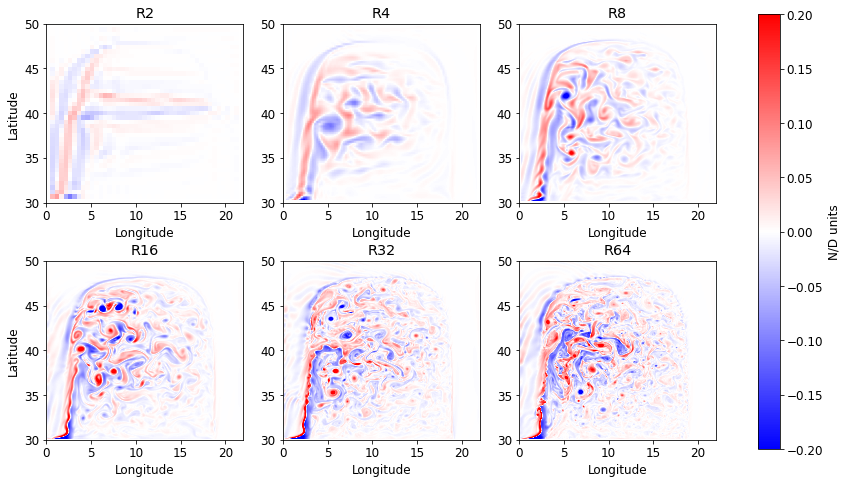

In [6]:
ds.plot_relative_vorticity_snapshot(('R2','R4', 'R8', 'R16', 'R32', 'R64'))

# Kinetic energy snapshot

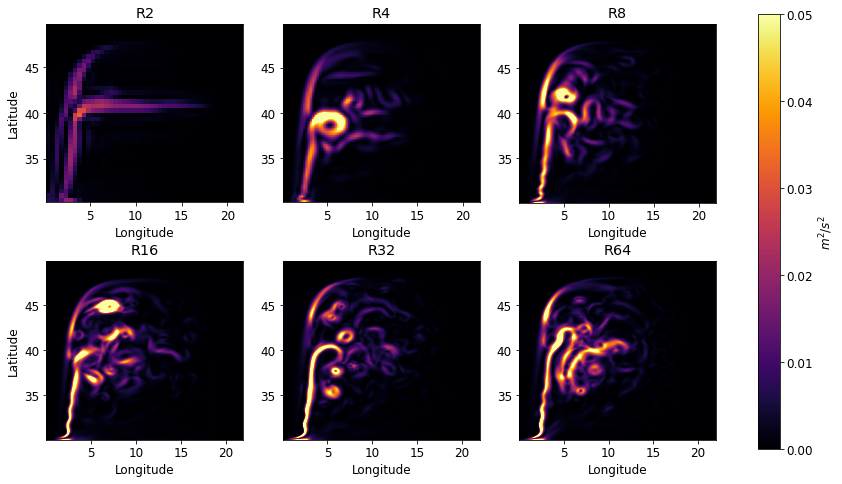

In [7]:
ds.plot_KE_snapshot(('R2','R4', 'R8', 'R16', 'R32', 'R64'))

# Eddy kinetic energy averaged over 10 years, upper layer

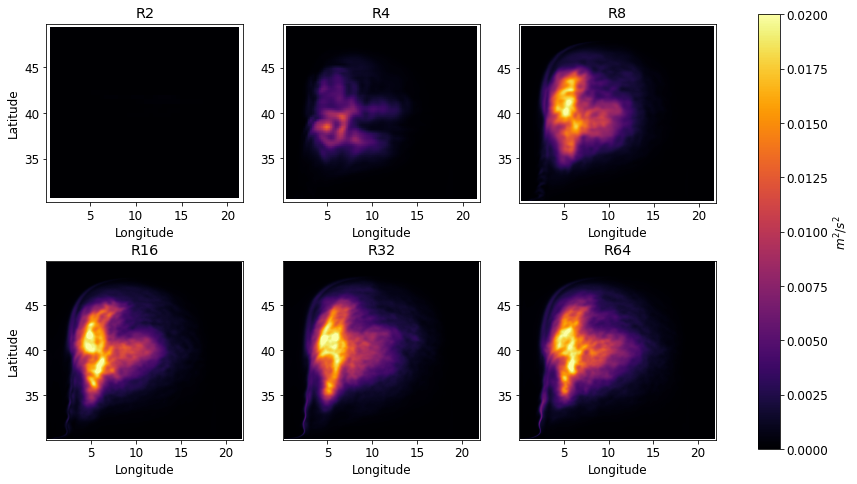

In [8]:
ds.plot_EKE(('R2','R4', 'R8', 'R16', 'R32', 'R64'))

# EKE, lower layer

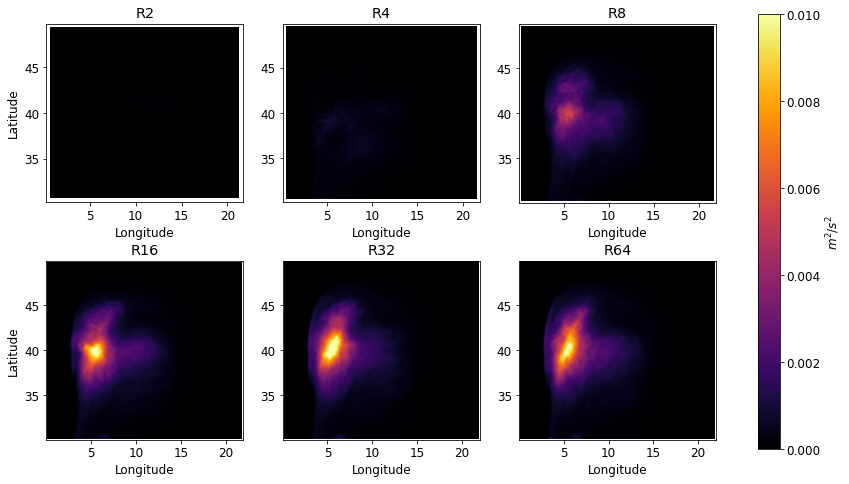

In [9]:
ds.plot_EKE(('R2','R4', 'R8', 'R16', 'R32', 'R64'), zl=1, vmax=0.01)

# Kinetic energy spectra

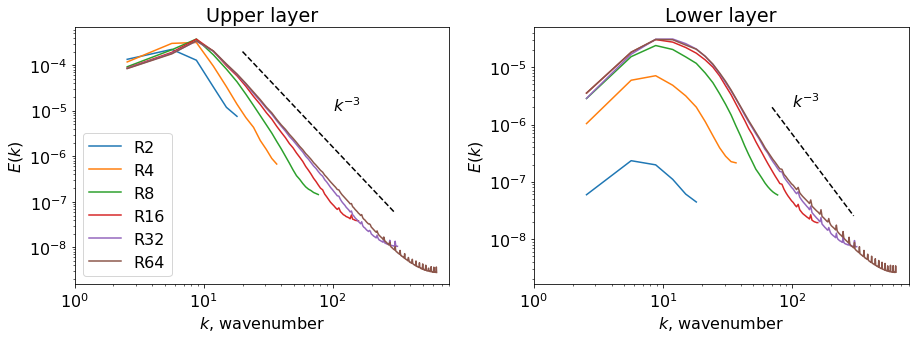

In [316]:
ds.plot_KE_spectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), tstart=3650., nfactor=2, nd_wavenumber=True)

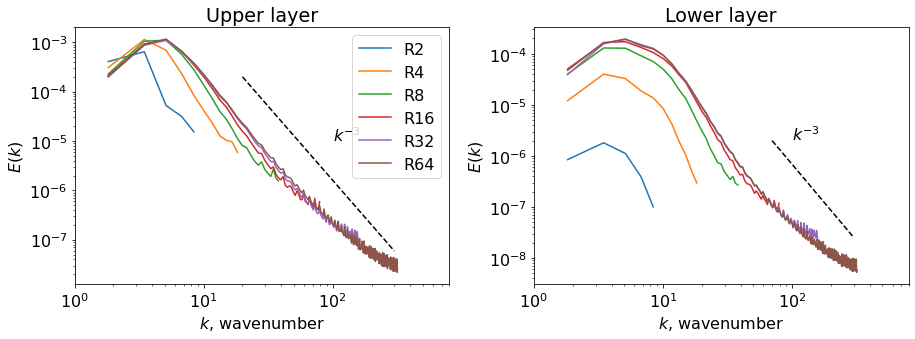

In [315]:
ds.plot_KE_spectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), tstart=3650., Lat=(35,45), Lon=(5,15), window='rect', nfactor=1, nd_wavenumber=True)

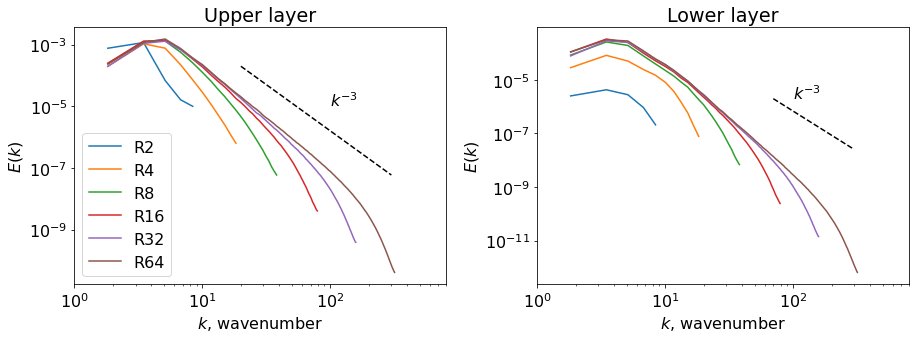

In [314]:
ds.plot_KE_spectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), tstart=3650., Lat=(35,45), Lon=(5,15), window='hanning', nfactor=1, nd_wavenumber=True)

(243, 2, 641, 704)


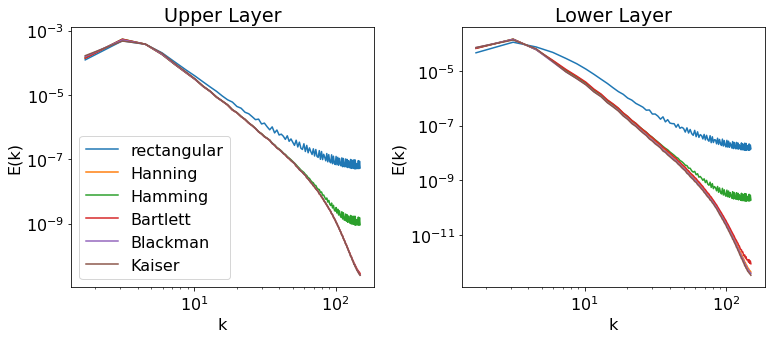

In [322]:
plt.figure(figsize=(11,5))
field = np.array(ds['R32'].prog.v)
print(field.shape)
field = field[:,:,100:400,200:500]
plt.subplot(121)
k, E = compute_spectrum(field[:,0,:,:], 'rect', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'hanning', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'hamming', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'bartlett', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'blackman', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,0,:,:], 'kaiser', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
plt.xlabel('k')
plt.ylabel('E(k)')
plt.title('Upper Layer')
plt.legend(('rectangular', 'Hanning', 'Hamming', 'Bartlett', 'Blackman', 'Kaiser'))
plt.subplot(122)
k, E = compute_spectrum(field[:,1,:,:], 'rect', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'hanning', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'hamming', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'bartlett', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'blackman', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)
k, E = compute_spectrum(field[:,1,:,:], 'kaiser', dx=1, dy=1,nd_wavenumber=True, nfactor=1)
plt.loglog(k,E)

plt.xlabel('k')
plt.ylabel('E(k)')
plt.title('Lower Layer')
plt.tight_layout()
plt.show()

# Energy cospectrum of biharmonic Smagorinsky

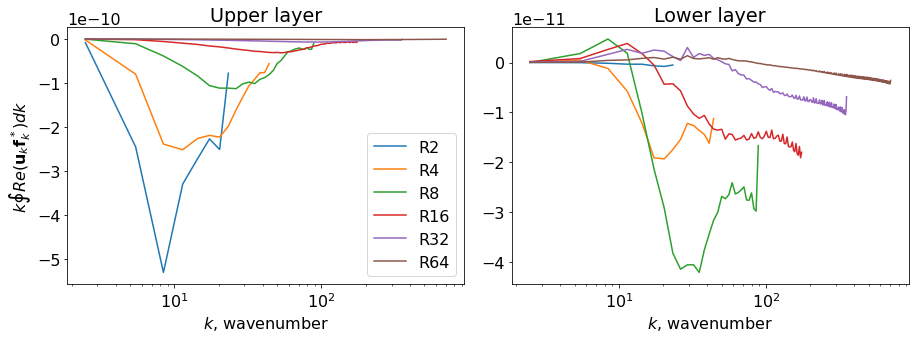

In [215]:
ds.plot_cospectrum(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'), tstart = 3650., nfactor=2, averaging=False)

# Analysis of mean flow: 10-years mean Sea Surface Height

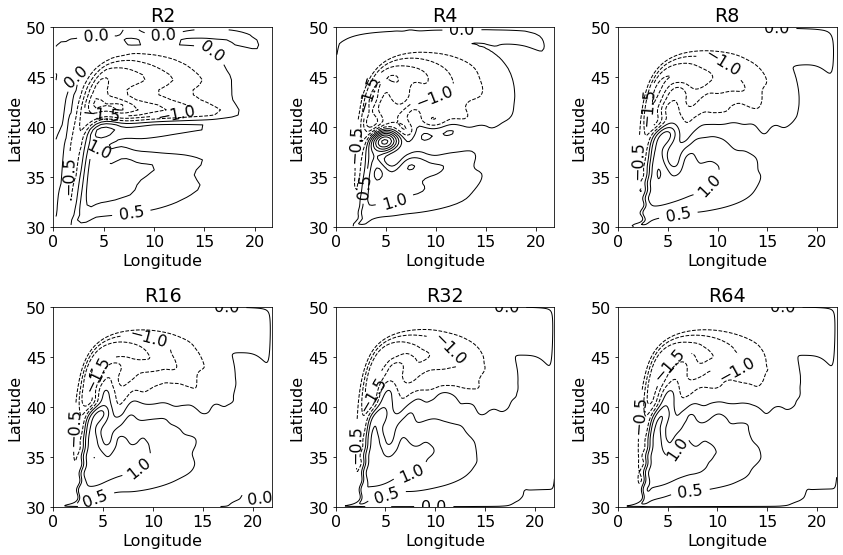

In [167]:
ds.plot_ssh(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'))

# Analysis of Kinetic Energy w.r.t. $1/64^o$ model

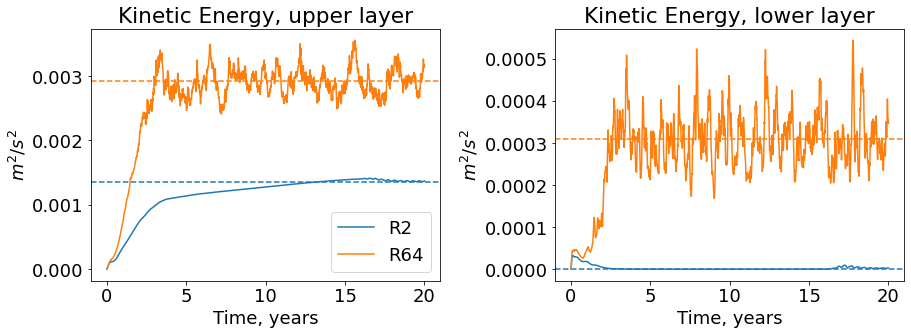

In [168]:
ds.plot_KE(('R2', 'R64'))

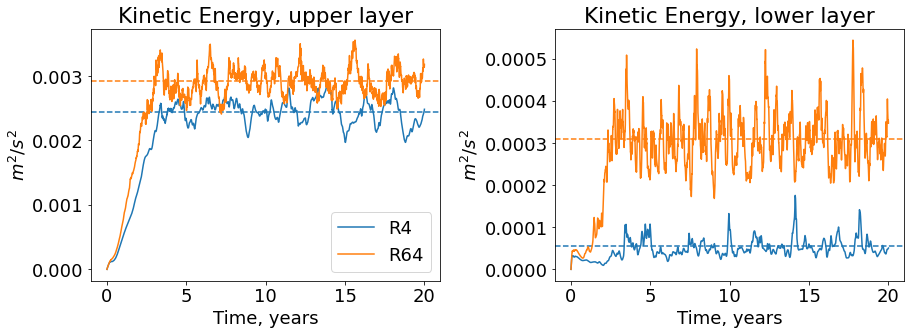

In [169]:
ds.plot_KE(('R4', 'R64'))

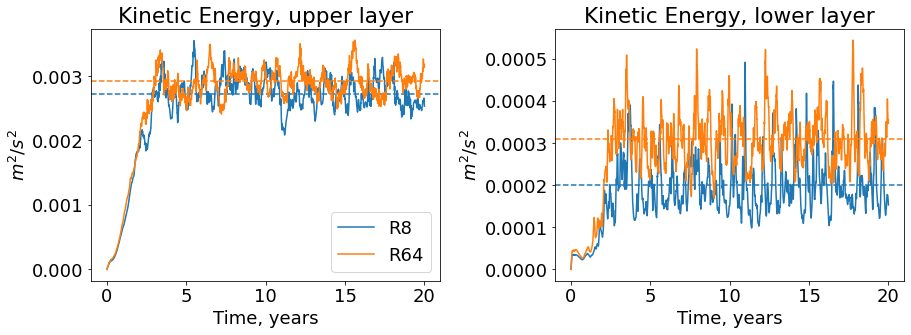

In [170]:
ds.plot_KE(('R8', 'R64'))

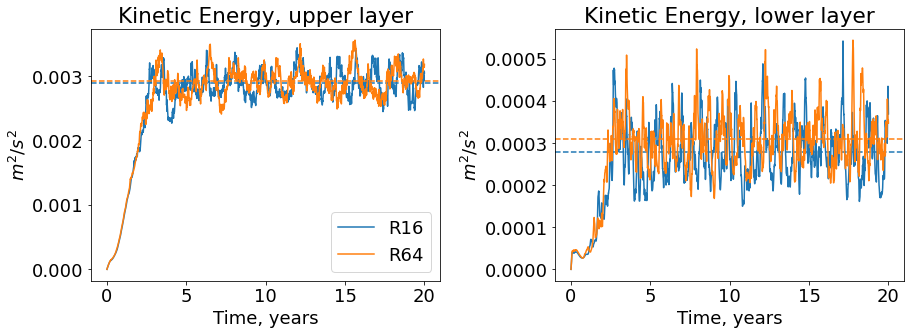

In [171]:
ds.plot_KE(('R16', 'R64'))

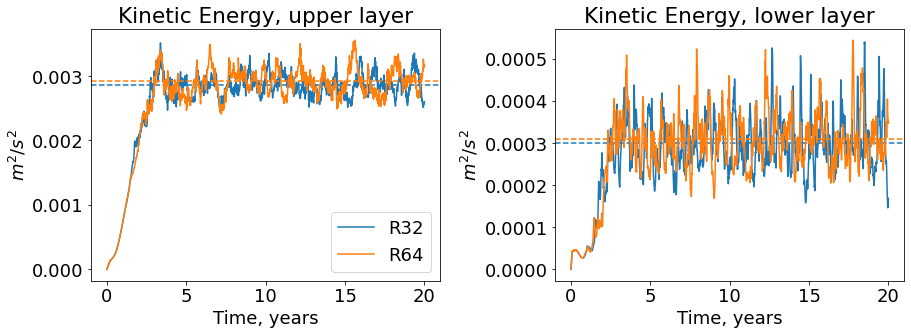

In [172]:
ds.plot_KE(('R32', 'R64'))